In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display_img(img):
    plt.figure(figsize=(8, 8))
    plt.imshow(img, cmap='gray')  # Use cmap='gray' to display the image in grayscale
    plt.axis('off')  # Turn off axis labels
    plt.show()

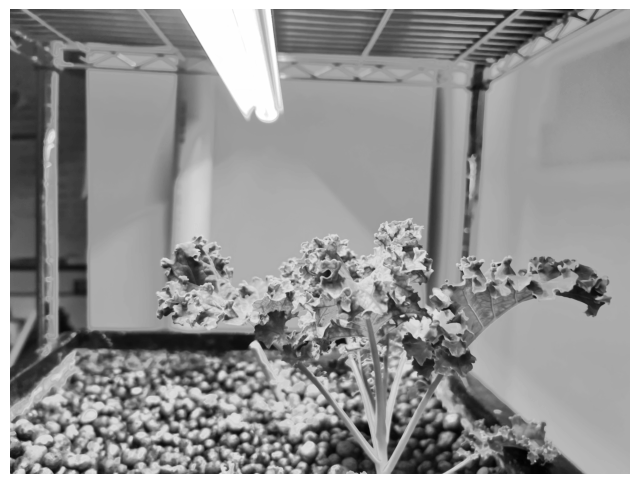

In [3]:
filepath = "plant.jpg"
img = cv.imread(filepath, cv.IMREAD_GRAYSCALE)
display_img(img)

In [4]:
neighborhood_size = 50

# Create an empty array to store pixel weights
pixel_weights = np.zeros_like(img, dtype=np.float32)

# Create a kernel for local standard deviation calculation
kernel = np.ones((neighborhood_size, neighborhood_size), np.float32) / (neighborhood_size ** 2)

# Calculate the local mean using filter2D
local_mean = cv.filter2D(img, -1, kernel)

# Calculate the local mean squared
local_mean_squared = cv.filter2D(img * img, -1, kernel)

# Calculate the local standard deviation
local_std_dev = np.sqrt(local_mean_squared - local_mean * local_mean)

# Assign local standard deviation values as pixel weights
pixel_weights = local_std_dev

# Normalize the pixel weights (optional)
pixel_weights = (pixel_weights - pixel_weights.min()) / (pixel_weights.max() - pixel_weights.min())

# You can now use pixel_weights for further processing or visualization.

In [5]:
normalized_std = pixel_weights / pixel_weights.max()
normalized_std

array([[0.497 , 0.497 , 0.497 , ..., 0.4473, 0.4473, 0.4473],
       [0.497 , 0.497 , 0.497 , ..., 0.4473, 0.4473, 0.4473],
       [0.501 , 0.501 , 0.501 , ..., 0.4473, 0.4473, 0.4473],
       ...,
       [0.865 , 0.865 , 0.865 , ..., 0.7056, 0.7056, 0.7056],
       [0.863 , 0.863 , 0.863 , ..., 0.7056, 0.7056, 0.7056],
       [0.863 , 0.863 , 0.863 , ..., 0.7056, 0.7085, 0.7085]],
      dtype=float16)

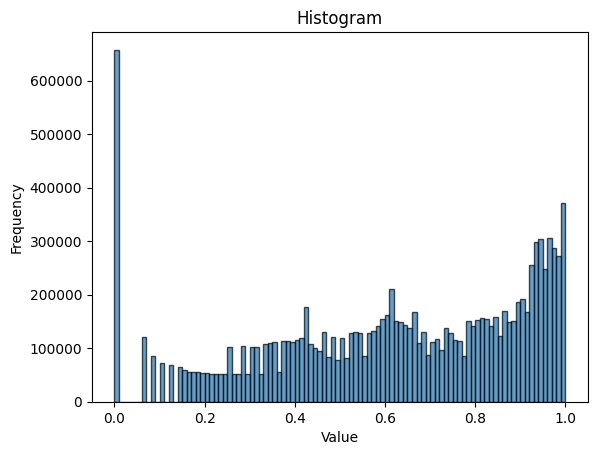

In [6]:
# Plot the histogram
plt.hist(normalized_std.flatten(), bins=100, edgecolor='k', alpha=0.7)
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

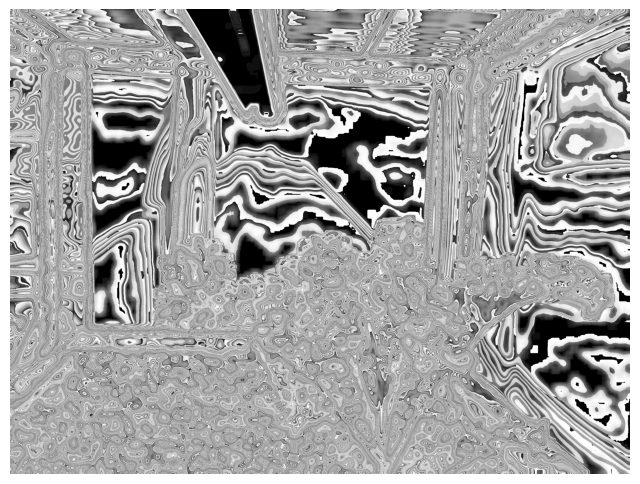

In [9]:
display_img(local_std_dev)